In [289]:
import numpy as np
import seaborn as sb
import pandas
import sys
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
%matplotlib notebook

# Simple two-layer, non-linear perceptron

We are going to implement a simple, perceptron with a non-linear sigmoid activation function and train it using backpropagation.

Weights are initialized with random numbers of mean 0 and then update iteratively using the error between network output and wanted labels. 

Initially, we are going to test very simple input-output relationships with the input consisting of a 3-dimensional vector with either 0 or 1, and the output consisting of a 1-dimensional target-value also with either 0 or 1.

output after training is:.000288
 [[ 0.00966449]
 [ 0.99211957]
 [ 0.99358898]
 [ 0.00786506]]


<IPython.core.display.Javascript object>


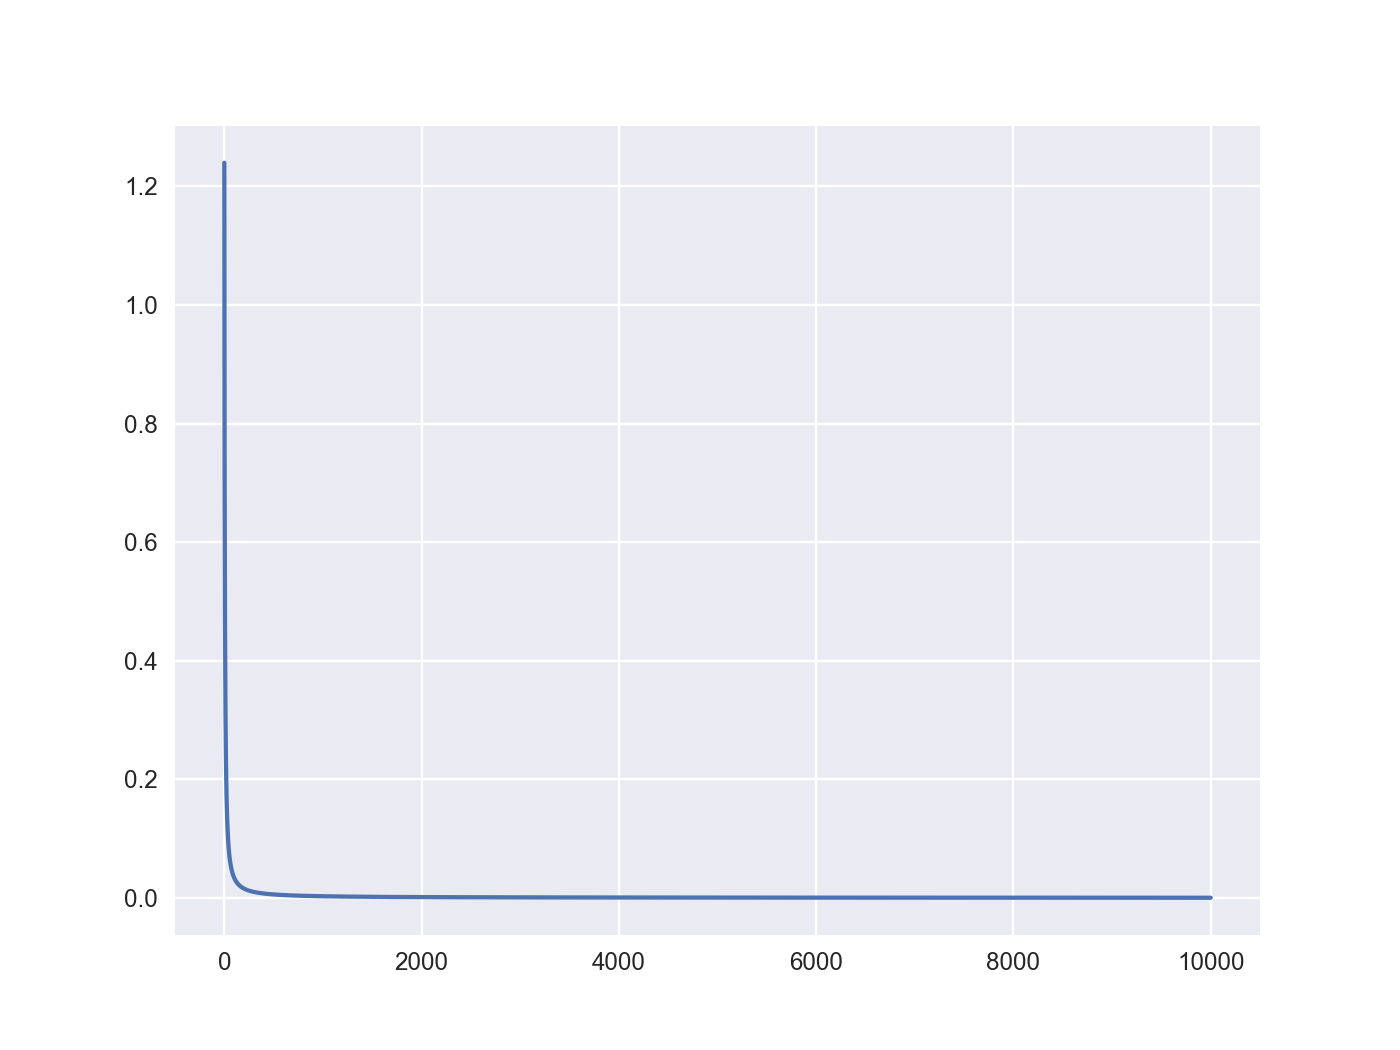

In [294]:
# a non-linear activation function
# here, we use a sigmoid shape
def sigmoid(x):
    return 1/(1+np.exp(-x))

# the derivative of the sigmoid
def dsigmoid(x):
    return x*(1-x)

# implements a simple two-layer network
def twoLayer(X,y,plotting=True):
    # seed random numbers to get repeatable results
    np.random.seed(1)

    # initialize weights randomly (mean 0)
    # the number of weights is determined by the number
    # of columns in both the input data X and the output
    # data y!
    syn0 = 2*np.random.random((X.shape[1],y.shape[1])) - 1

    # maximum iteration
    maxIter = 10000

    # store errors
    l1ErrorArray = np.zeros(maxIter)

    # do some iterations
    for it in np.arange(maxIter):

        # forward propagation: we put in our pattern
        # as layer "0" and then push it through the
        # activation function to get the output of
        # the layer
        l0 = X
        l1 = sigmoid(np.dot(l0,syn0))

        # evaluate the error of the layer
        l1Error = y - l1

        # evaluate the summed squared error
        l1ErrorArray[it] = np.sum(l1Error*l1Error)

        # print out the summed squared error sometimes
        if (it%1000==0):
            sys.stdout.write("Iteration {:d}: error = {:f}\r".format(it,l1ErrorArray[it]))
            sys.stdout.flush()

        # the error determines the amount we need
        # to move along the derivative
        l1Delta = l1Error * dsigmoid(l1)

        # the weight update is the dot product between
        # the pattern input and the correction amount 
        syn0 += np.dot(l0.T,l1Delta)

    print("output after training is:\n",l1)
    if (plotting):
        fig,ax = plt.subplots(figsize=(8,6))
        plt.plot(l1ErrorArray)
    return(syn0,l1ErrorArray)
    
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1] ])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# note, that each row here corresponds to the
# row in X - so we are trying to basically
# learn two class labels from data here
y = np.array([[0],
              [1],
              [1],
              [0]])

# let's call our function and do the training
(weights,errors)=twoLayer(X,y)

That went pretty well. We achieved fast learning. 

Notice, however, that the first row of the training examples was fully correlated to the target values! Hence, among all the training examples, this should have been easy to find out!

In fact, let's check the weights of the network:

In [293]:
weights

array([[ 9.67299303],
       [-0.2078435 ],
       [-4.62963669]])

Predictably, the first data dimension was given a large positive weight, whereas the other dimensions were given small and/or negative weights.

Note, however, that the weights are not the weights that would be given by a linear perceptron, since the weights here sit inside the sigmoid activation function!

$Out_j = 1/(1+e^{-\sum_k w_jk x_k})$

So, what about a different, less correlated target value vector?

output after training is:.000528
 [[ 0.98742439]
 [ 0.98975351]
 [ 0.99999806]
 [ 0.01453041]]


<IPython.core.display.Javascript object>


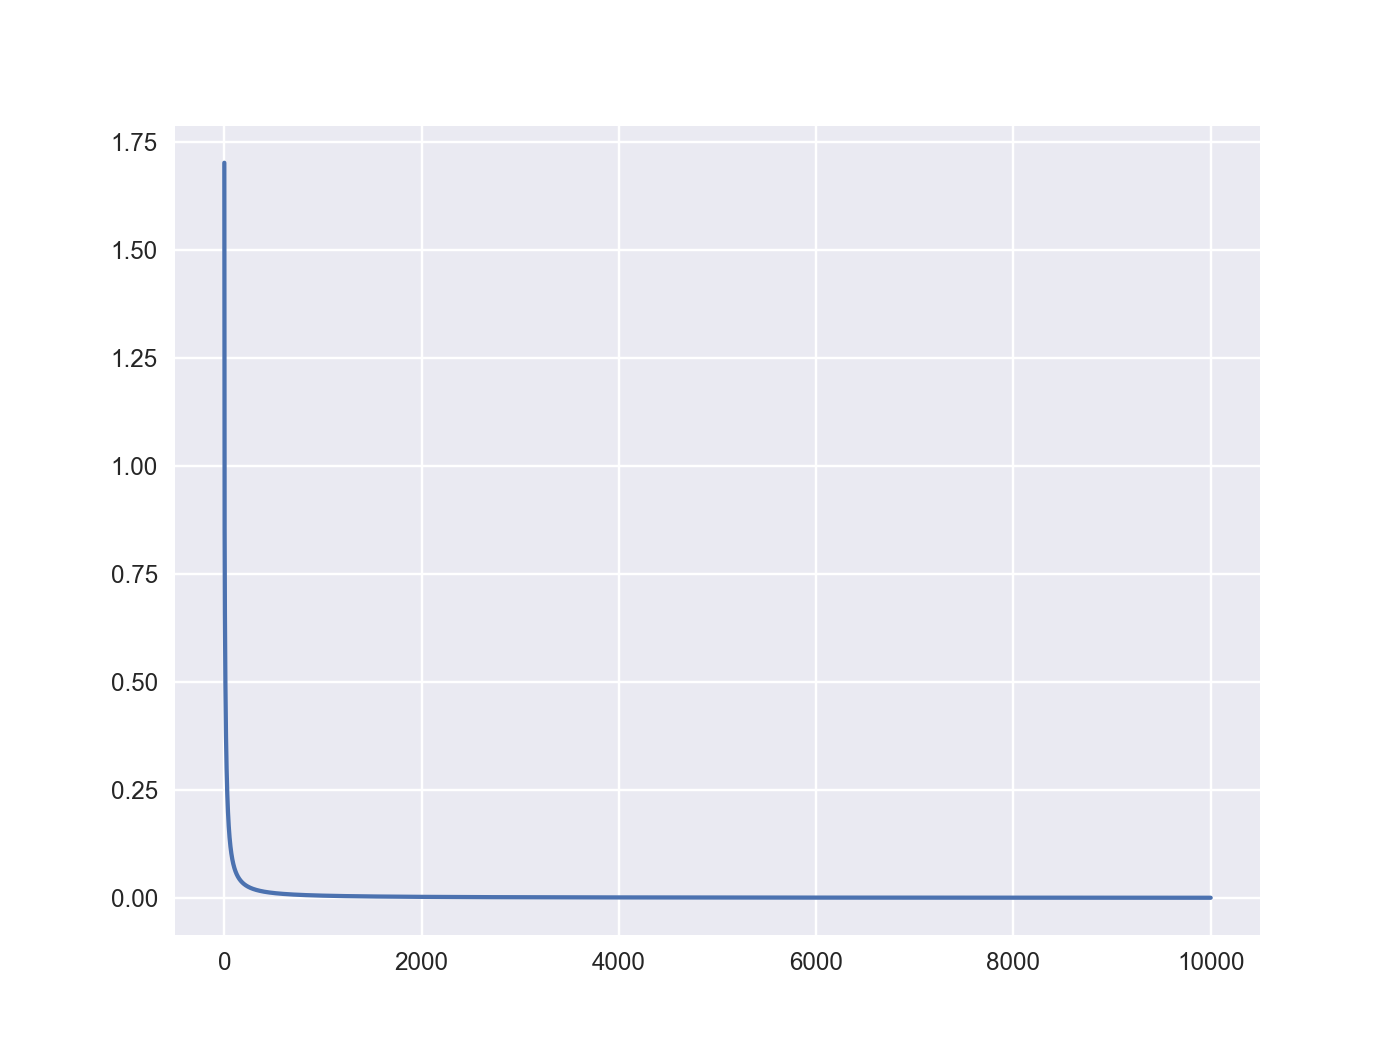

[[ 8.78749945]
 [-8.58031968]
 [ 4.36339277]]


In [295]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1] ])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# note, that each row here corresponds to the
# row in X - so we are trying to basically
# learn two class labels from data here
y = np.array([[1],
              [1],
              [1],
              [0]])

# let's call our function and do the training
(weights,errors)=twoLayer(X,y)
print(weights)

That works as well. 

We have seen that networks can learn simple logical functions, so this one should do that too, right? Let's try:

[False  True  True  True  True  True False False]
output after training is:.000057
 [[ 0.50003376]
 [ 0.99643638]
 [ 0.9964359 ]
 [ 0.50006753]
 [ 0.99643542]
 [ 0.9964359 ]
 [ 0.50003376]
 [ 0.5       ]]


<IPython.core.display.Javascript object>


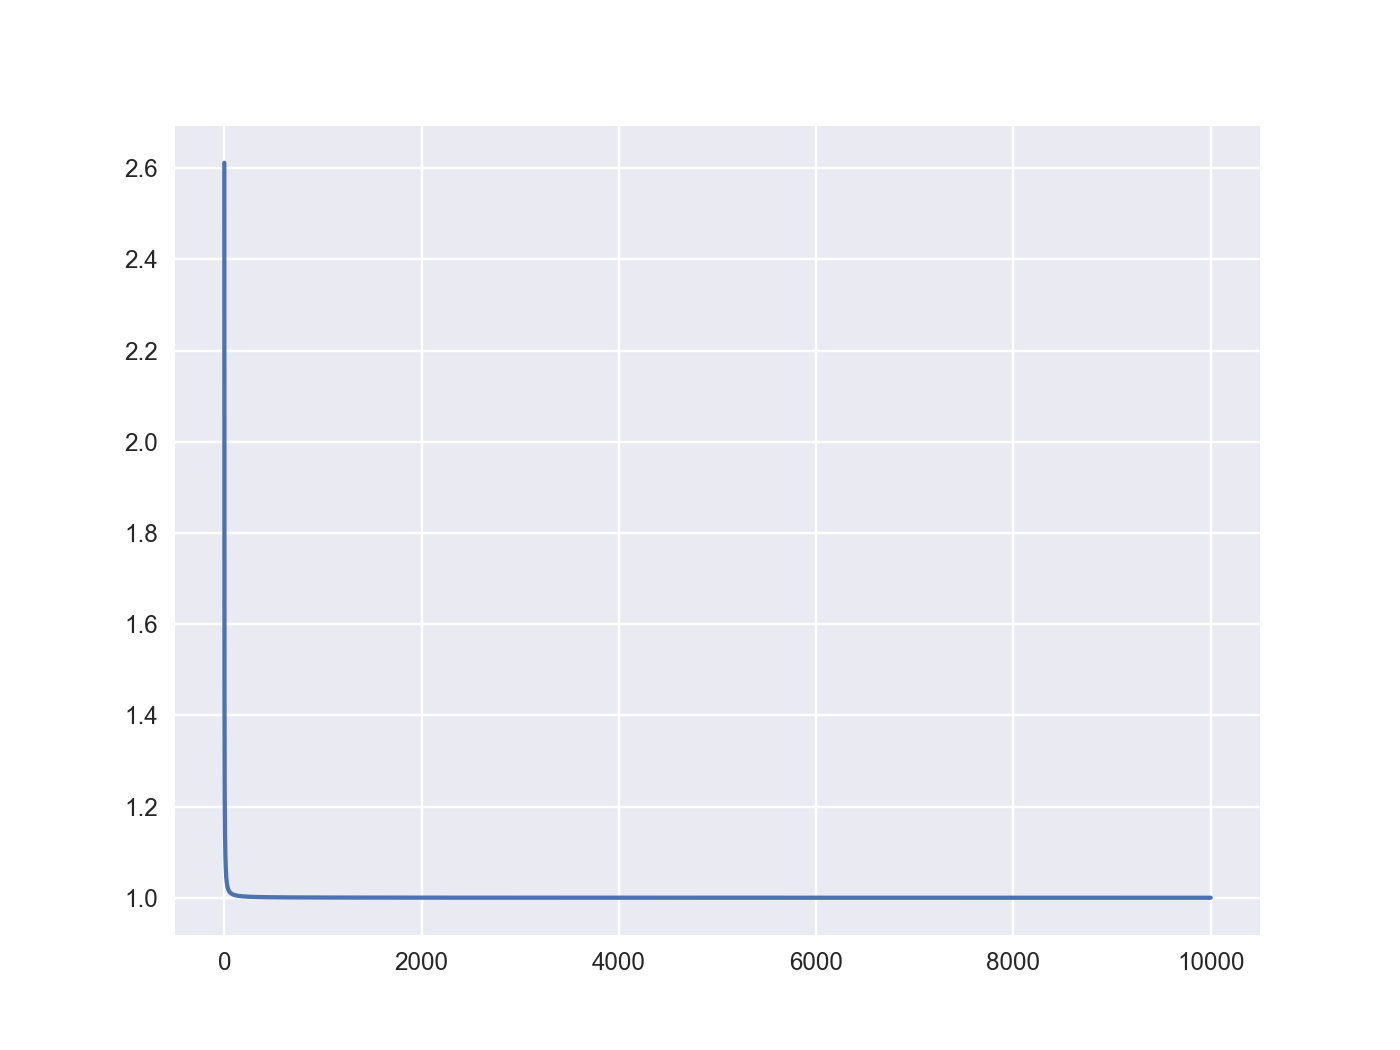

[[  5.63318807e+00]
 [  1.35045597e-04]
 [  1.35045597e-04]]


In [296]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1],
                [1,0,0],
                [1,1,0],
                [0,1,0],
                [0,0,0]])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# here is a simple, logical combination:
y = np.logical_or(X[:,0],np.logical_and(X[:,1],X[:,2]))
print(y)

# let's call our function and do the training:
(weights,errors)=twoLayer(X,y.reshape(-1,1))
print(weights)

But we forgot something! Right now, what we can do is to change the weights on the sigmoids. But we have no way to shift the whole curve!! This is what the "bias" neuron can do.

To see why this is important, imagine we are trying to fit a line by only having weights:

$ y = w*x$

This can of course only change the slope of the line. But we also need to shift the line, so we need an intercept or bias:

$ y = w*x + b$


Let's add this neuron to our two-layer network:

In [301]:
def twoLayerBias(X,y,plotting=True):
    # seed random numbers to get repeatable results
    np.random.seed(1)
    
    # let's add ones to the data to model the bias
    X=np.hstack((np.ones((X.shape[0],1)),X))
    # initialize weights randomly (mean 0)
    # the number of weights is determined by the number
    # of columns in both the input data X (but remember we
    # have the bias). We still connect of course to the 
    # output dimensions determined by the data y 
    syn0 = 2*np.random.random((X.shape[1],y.shape[1])) - 1

    # maximum iteration
    maxIter = 10000

    # store errors
    l1ErrorArray = np.zeros(maxIter)

    # do some iterations
    for it in np.arange(maxIter):

        # forward propagation: we put in our pattern
        # as layer "0" and then push it through the
        # activation function to get the output of
        # the layer
        l0 = X
        l1 = sigmoid(np.dot(l0,syn0))

        # evaluate the error of the layer
        l1Error = y - l1

        # evaluate the summed squared error
        l1ErrorArray[it] = np.sum(l1Error*l1Error)

        # print out the summed squared error sometimes
        if (it%1000==0):
            sys.stdout.write("Iteration {:d}: error = {:f}\r".format(it,l1ErrorArray[it]))
            sys.stdout.flush()

        # the error determines the amount we need
        # to move along the derivative
        l1Delta = l1Error * dsigmoid(l1)

        # the weight update is the dot product between
        # the pattern input and the correction amount 
        syn0 += np.dot(l0.T,l1Delta)

    print("output after training is:\n",l1)
    if (plotting):
        fig,ax = plt.subplots(figsize=(3,2))
        plt.plot(l1ErrorArray)
    return(syn0,l1ErrorArray)


[False  True  True  True  True  True False False]
output after training is:.002007
 [[  2.21503422e-02]
 [  9.99999995e-01]
 [  9.99991507e-01]
 [  9.75477577e-01]
 [  9.85304245e-01]
 [  9.99991507e-01]
 [  2.21503422e-02]
 [  1.28990339e-05]]


<IPython.core.display.Javascript object>


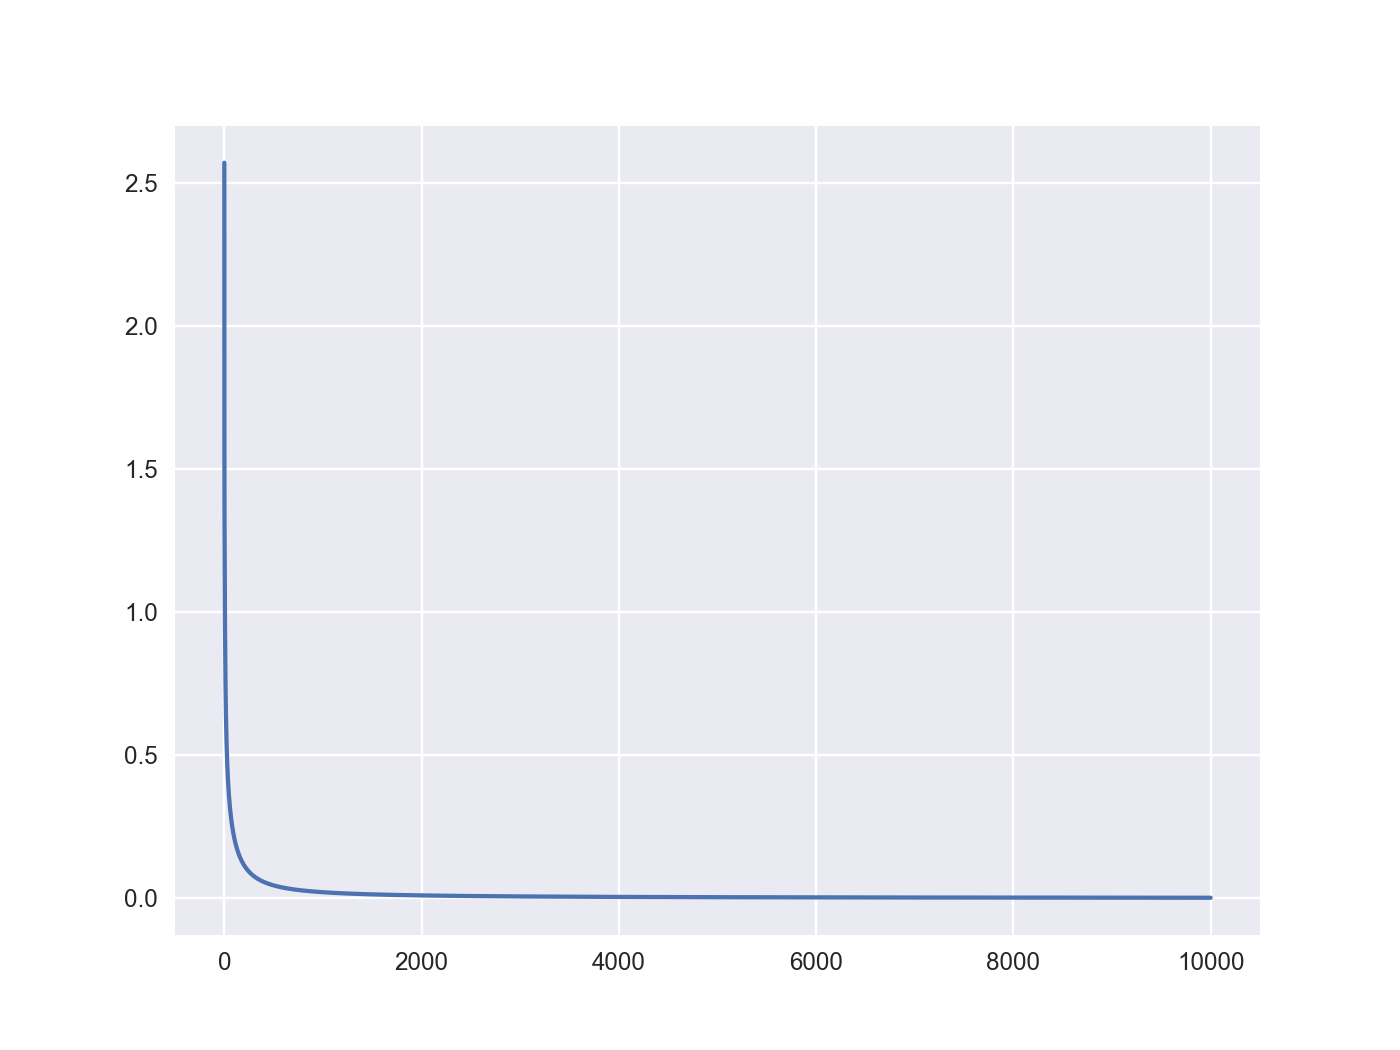

[[-11.25850538]
 [ 15.46394984]
 [  7.47094908]
 [  7.47094908]]


In [298]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1],
                [1,0,0],
                [1,1,0],
                [0,1,0],
                [0,0,0]])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# here is a simple, logical combination:
y = np.logical_or(X[:,0],np.logical_and(X[:,1],X[:,2]))
print(y)

# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y.reshape(-1,1))
print(weights)

Cool, that works.

So let's try something very different. Let's go back to our beautiful IRIS dataset and try to categorize using a two-layer network:

output after training is:0.000000
 [[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


<IPython.core.display.Javascript object>


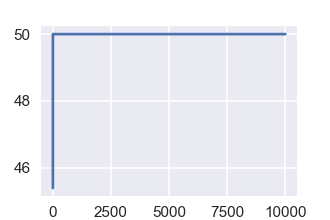

[[  1.64392144]
 [ 11.59794935]
 [  3.50654064]
 [  8.65774037]
 [  2.18799441]]


In [302]:
iris = load_iris()
# these are the inputs to our neural network
# each row is one training example
X = iris.data[:100]
    
# this is the target state we want to have
y = iris.target[:100]

# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y.reshape(-1,1))
print(weights)

Ugh. That did not go so well. Somehow, the network did not learn. Instead the error goes pretty much immediately to high values. What went wrong?

The problem is in the input values. When using the gradient for updating the weights, the gradient can become too big and the network "overshoots". The best solution is to:

* normalize the data: `X = (X-X.mean(axis=0))/X.std(axis=0)`

output after training is:.000000
 [[  3.49611835e-15]
 [  2.01814197e-13]
 [  2.58559520e-16]
 [  1.06005606e-15]
 [  1.82841802e-16]
 [  4.98251701e-13]
 [  4.62864850e-17]
 [  6.71404906e-15]
 [  4.01805478e-16]
 [  1.56224140e-14]
 [  4.25245952e-14]
 [  6.74329658e-16]
 [  6.58273991e-15]
 [  3.24781690e-19]
 [  2.76812768e-14]
 [  8.73141143e-15]
 [  2.39866240e-14]
 [  2.32482390e-14]
 [  3.04535307e-11]
 [  6.95746974e-16]
 [  1.38257491e-11]
 [  1.91877837e-14]
 [  1.94819086e-20]
 [  1.72046872e-10]
 [  6.56118084e-15]
 [  4.24065193e-12]
 [  6.33814686e-13]
 [  3.44109866e-14]
 [  6.68492838e-14]
 [  2.51576621e-15]
 [  4.81039692e-14]
 [  1.34139509e-10]
 [  1.01689447e-18]
 [  7.48451394e-17]
 [  1.56224140e-14]
 [  1.18689927e-14]
 [  7.39912799e-13]
 [  1.56224140e-14]
 [  4.53812430e-17]
 [  3.09546282e-14]
 [  2.36199549e-15]
 [  2.93635297e-11]
 [  2.63837964e-18]
 [  6.75772663e-12]
 [  9.61025530e-14]
 [  2.91081476e-13]
 [  2.23366123e-16]
 [  1.19726246e-16]
 [  9.

<IPython.core.display.Javascript object>


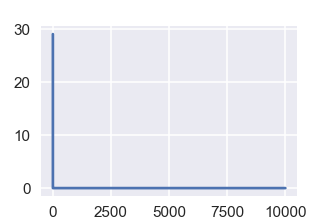

[[  0.32927224]
 [  9.75804697]
 [ -6.73781025]
 [ 10.93087887]
 [ 10.67497375]]


In [303]:
iris = load_iris()
# these are the inputs to our neural network
# each row is one training example
X = iris.data[:100]
    
# normalize the data
X = (X-X.mean(axis=0))/X.std(axis=0)

# this is the target state we want to have
y = iris.target[:100]

# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y.reshape(-1,1))
print(weights)

Good. As we can see, the examples are correctly recognized and the weights that are given to the four dimensions are now different.

## Breaking the neural network

Let's return to our simple, 0/1 example and try a different training/testing combination:

output after training is:.000000
 [[ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]


<IPython.core.display.Javascript object>


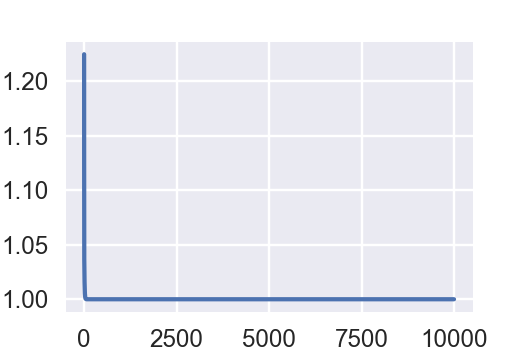

[[  1.14689432e-01]
 [ -1.94289029e-16]
 [ -1.94289029e-16]
 [ -1.14689432e-01]]


In [304]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1] ])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# note, that each row here corresponds to the
# row in X - so we are trying to basically
# learn two class labels from data here
y = np.array([[1],
              [1],
              [0],
              [0]])

# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y)
print(weights)

Ouch. So that does not work. We have left the realm of simple correlations and the output space is a weird, highly non-linear combination of the inputs.

But this is a sigmoid-network, so can our network even learn non-linear things?

[-2.5  1.  -1.5  0. ]
output after training is:.500109
 [[  1.70402827e-05]
 [  5.02831244e-06]
 [  7.74285146e-06]
 [  1.10662261e-05]]


<IPython.core.display.Javascript object>


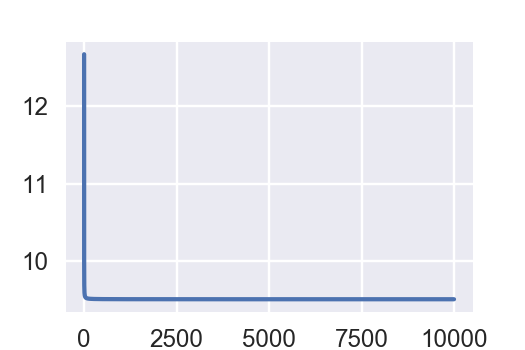

[[-5.37531646]
 [-0.78882597]
 [-0.43168328]
 [-5.60469532]]


In [305]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1] ])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# here is an explictly non-linear function:
y = (X[:,0]+(X[:,1]-X[:,2])/(X[:,1]+0.4))
print(y)

# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y.reshape(-1,1))
print(weights)

Apparently not. But wait!

If we look at the "y" target values, we can see that they are well outside the 0,1 range of the network inputs. Since the activation function itself is normalized between 0 and 1, we of course should normalize our output to be between 0 and 1:

[-2.5  1.  -1.5  0. ]
[ 0.          1.          0.28571429  0.71428571]
output after training is:.000144
 [[ 0.00804052]
 [ 0.99196437]
 [ 0.28577693]
 [ 0.71434837]]


<IPython.core.display.Javascript object>


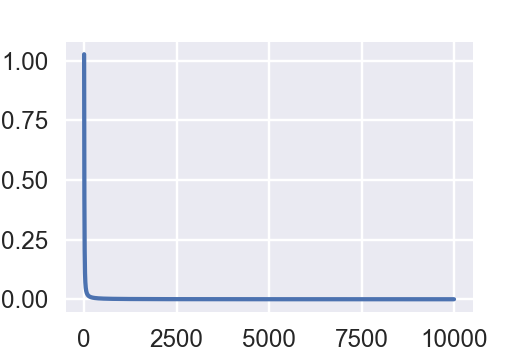

[[-2.29293016]
 [ 3.89925534]
 [ 5.73183693]
 [-2.52230902]]


In [306]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1] ])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# here is an explictly non-linear function:
y = (X[:,0]+(X[:,1]-X[:,2])/(X[:,1]+0.4))
print(y)
y = (y-y.min())/(y.max()-y.min())
print(y)

# let's call our function and do the training:
(weights,errors)=twoLayerBias(X,y.reshape(-1,1))
print(weights)

But, still, the example from above cannot apparently be learned. This is because even though we have non-linear activation, the target vectors are far outside the "span" of the input examples.

The solution? 

More layers!

## Three-layer network

Let's add a "hidden" layer to our network. We also add a bias node to the input layer of the network in order to be able to shift the outputs around.

Finally, since multi-layer networks use a gradient descent via backpropagation, we are in danger of getting stuck in local minima. One way to avoid this is to use a "learning rate" that is used to dampen the step size update. 

In [307]:
def threeLayerBias(X,y,numHidden=5,alpha=0.02,plotting=True):

    # seed random numbers to get repeatable results
    np.random.seed(1)

    # let's add ones to the data to model the bias
    X=np.hstack((np.ones((X.shape[0],1)),X))
    
    # initialize weights randomly (mean 0)
    syn0 = 2*np.random.random((X.shape[1],numHidden)) - 1
    syn1 = 2*np.random.random((numHidden,y.shape[1])) - 1

    # maximum iteration
    maxIter = 40000

    # store errors
    l2ErrorArray = np.zeros(maxIter)

    # do some iterations
    for it in np.arange(maxIter):

        # forward propagation: we put in our pattern
        # as layer "0" and then push it through the
        # activation function to get the output of
        # the layer
        l0 = X
        l1 = sigmoid(np.dot(l0,syn0))
        l2 = sigmoid(np.dot(l1,syn1))

        # evaluate the error of the layer
        l2Error = y - l2

        l2ErrorArray[it] = np.sum(l2Error*l2Error)

        if (it%1000==0):
            sys.stdout.write("Iteration {:d}: error = {:f}\r".format(it,l2ErrorArray[it]))
            sys.stdout.flush()

        # the error determines the amount we need
        # to move along the derivative
        # to "regularize" this further, we multiply by the 
        # learning rate alpha

        l2Delta = l2Error*dsigmoid(l2)
        l1Delta = l2Delta.dot(syn1.T)*dsigmoid(l1)

        # the weight update is the dot product between
        # the pattern input and the correction amount
        # this is moderated by the "learning rate" alpha
        syn1 += alpha*np.dot(l1.T,l2Delta)
        syn0 += alpha*np.dot(X.T,l1Delta)

    print("output after training is:\n",l2)

    if (plotting):
        fig,ax = plt.subplots(figsize=(8,6))
        plt.plot(l2ErrorArray)
    return(syn1,l2ErrorArray,l2)

output after training is:0.000095
 [[ 0.99731159]
 [ 0.99347   ]
 [ 0.00386904]
 [ 0.0052318 ]]


<IPython.core.display.Javascript object>


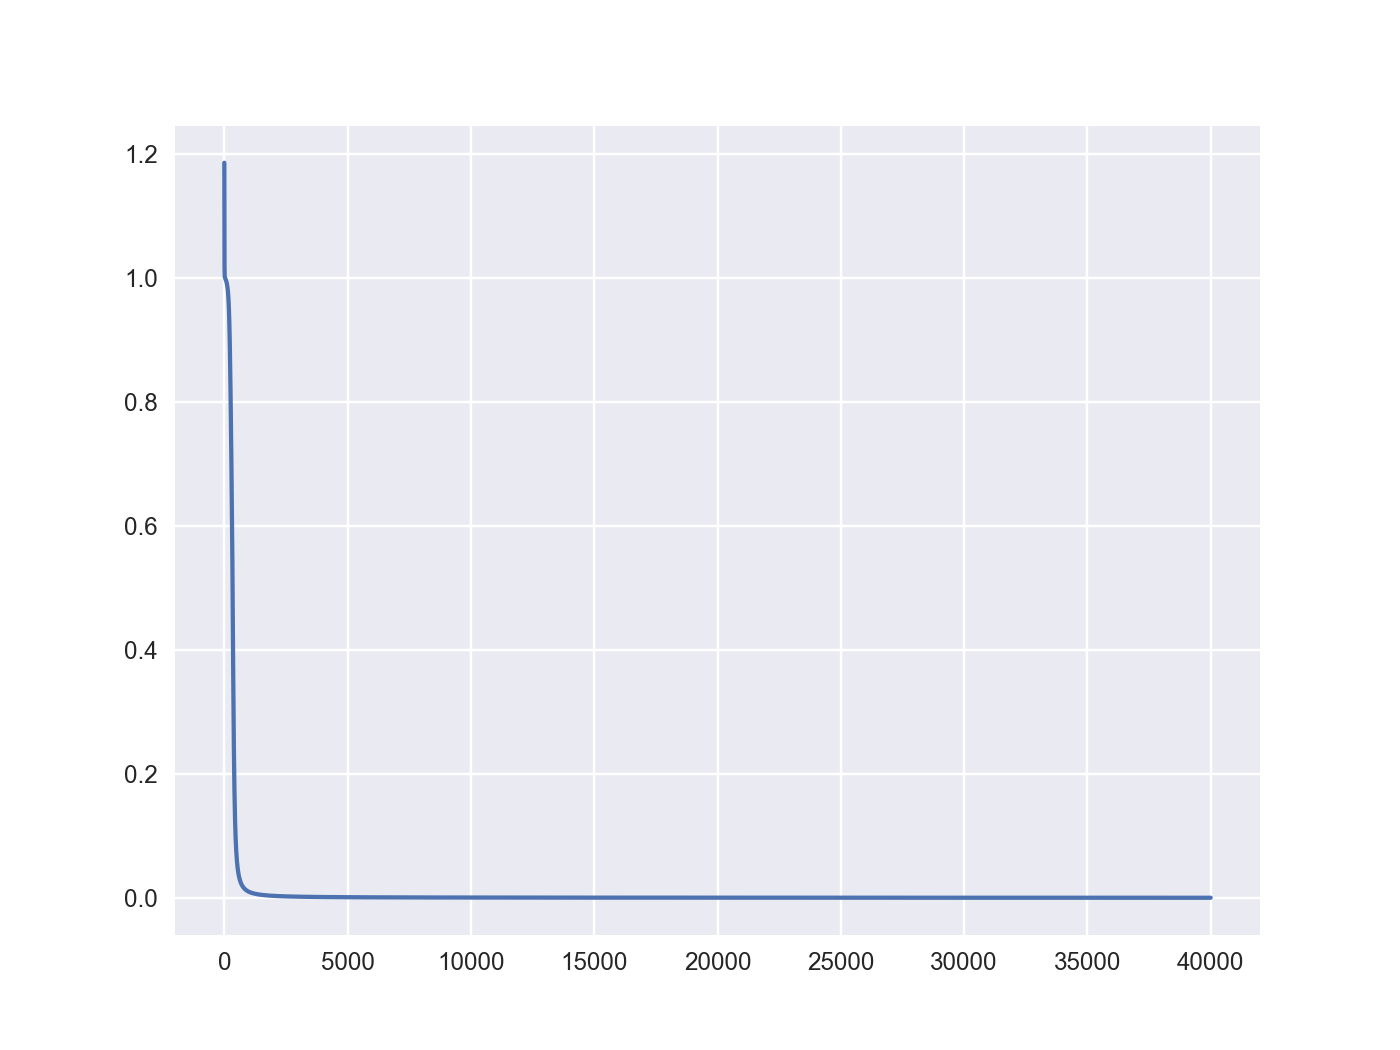

[[ -0.75898513]
 [  5.70440772]
 [ -8.04697451]
 [-11.26665849]
 [  6.68625071]]


In [312]:
# these are the inputs to our neural network
# each row is one training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1] ])
    
# this is the target state we want to have, 
# our input is three numbers, our output is
# one number
# note, that each row here corresponds to the
# row in X - so we are trying to basically
# learn two class labels from data here
y = np.array([[1],
              [1],
              [0],
              [0]])

# let's call our function and do the training:
(weights,errors,_)=threeLayerBias(X,y,5,1)
print(weights)

Alright, now this one works. You can also clearly see the location, where the optimization kicked in to do another round.

output after training is:0.002994
 [[  1.19089674e-04]
 [  1.51833591e-04]
 [  1.28071506e-04]
 [  1.31216075e-04]
 [  1.16884730e-04]
 [  1.11258777e-04]
 [  1.28326480e-04]
 [  1.22950518e-04]
 [  1.39664534e-04]
 [  1.31246784e-04]
 [  1.06239392e-04]
 [  1.22507302e-04]
 [  1.35783690e-04]
 [  1.19502022e-04]
 [  9.03453312e-05]
 [  9.09285791e-05]
 [  1.12366453e-04]
 [  1.25259143e-04]
 [  1.01453547e-04]
 [  1.16387495e-04]
 [  1.22188005e-04]
 [  1.24587000e-04]
 [  1.24875607e-04]
 [  1.80291253e-04]
 [  1.23315465e-04]
 [  1.65443301e-04]
 [  1.40450406e-04]
 [  1.17844116e-04]
 [  1.23290439e-04]
 [  1.28771737e-04]
 [  1.39755789e-04]
 [  1.43446958e-04]
 [  9.87126766e-05]
 [  8.94584439e-05]
 [  1.31246784e-04]
 [  1.33288296e-04]
 [  1.15995679e-04]
 [  1.31246784e-04]
 [  1.28452853e-04]
 [  1.23064292e-04]
 [  1.25586696e-04]
 [  5.67550324e-03]
 [  1.22822767e-04]
 [  1.58691142e-04]
 [  1.27314639e-04]
 [  1.64252656e-04]
 [  1.10179887e-04]
 [  1.26055711e-04]
 [  1

<IPython.core.display.Javascript object>


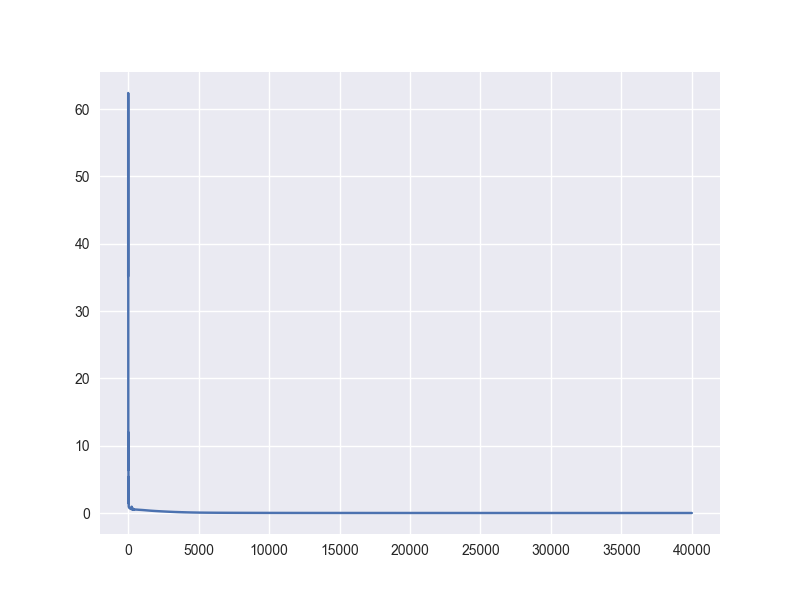

[[ -2.08204843]
 [  3.06171482]
 [ -0.75660687]
 [ 13.98464441]
 [ -3.40779367]
 [ -4.17836411]
 [ 16.03960426]
 [  0.82524807]
 [ -0.3092005 ]
 [ -5.16919582]]


<IPython.core.display.Javascript object>


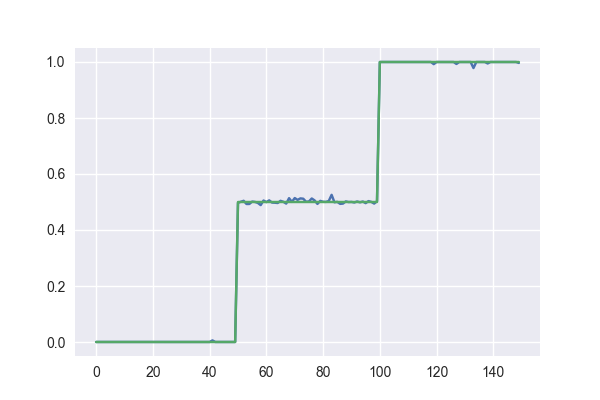

In [315]:
iris = load_iris()
# these are the inputs to our neural network
# each row is one training example
X = iris.data
X = (X-X.mean(axis=0))/X.std(axis=0)    
# this is the target state we want to have
y = iris.target/2

# let's call our function and do the training:
(weights,errors,pred)=threeLayerBias(X,y.reshape(-1,1),10,1)
print(weights)
fig,ax = plt.subplots(figsize=(6,4))
plt.plot(pred)
plt.plot(y)